# Data Analysis Toolbox Session 1
## Made by Gururaj Deshpande

Welcome to the first week of Machine Learning. We hope you are doing well. This first week, we will introduce some core concepts essential to performing well in this class. This tutorial will cover NumPy and it's broadcasting functionality. We will also cover some basic Python concepts that will be useful for the rest of the course.

# Who is Guru? 

[This is him](https://mahdi-roozbahani.github.io/CS46417641-spring2023/profiles/gd.png)

## Linear Algebra Operations
### [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

In [1]:
import numpy as np
import numpy.random as nprd
import numpy.linalg as npla

#### [Python Lists vs. Numpy Arrays](https://webcourses.ucf.edu/courses/1249560/pages/python-lists-vs-numpy-arrays-what-is-the-difference)

In [2]:
python_list = [1,2,3]
python_nparray = np.array([1, 2, 3])
python_list, python_nparray

([1, 2, 3], array([1, 2, 3]))

## Vectors

#### Vector creation

In [3]:
x = np.array([1, 2, 3])
y = np.array([2, 4, 6])
x, y

(array([1, 2, 3]), array([2, 4, 6]))

#### Vector operation

In [4]:
np.sum(x)

6

In [5]:
np.mean(x)

2.0

In [6]:
np.std(x)

0.816496580927726

## What is NumPy?

NumPy is a Python library for working with arrays. It is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this tutorial useful to get started with NumPy since NumPy uses the same concepts as MATLAB.

## Why NumPy?

NumPy is much much faster! Wanna see?

In [7]:
# Start by importing NumPy so we can use it!
import numpy as np

**Having issues importing NumPy?** Make sure you have Anaconda installed (guide found on EdStem) and run the following command in your terminal: `conda install numpy`

In [8]:
# Creating a list of 1000 zeros in NumPy and Python
numpy_array = np.zeros(1_000) # Yes! You can use underscores with large numbers in Python 3.6+ to make them more readable
python_array = [0] * 1_000 # This is fancy syntax in Python. You could have used a for loop as well

We do the same operation of adding 1 to each element in the array 1,000 times and get the time taken over multiple trials. We will use the `%%timeit` magic function to get the time taken for each trial. The `%%timeit` magic function will run the code multiple times and give us the average time taken.

In [9]:
%timeit numpy_array + 1

1.26 µs ± 11.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [10]:
%timeit [x + 1 for x in python_array]

37.5 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


We see that NumPy takes the 👑 here! NumPy is around x30 times faster. **What if we increase the size of the array?**

In [11]:
numpy_array = np.zeros(1_000_000)
python_array = [0] * 1_000_000

In [12]:
%timeit numpy_array + 1

2.11 ms ± 94 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%timeit [x + 1 for x in python_array]

50.5 ms ± 1.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


But how is NumPy so fast 🤯! Python is taking a lot of time to do the same thing. This is because NumPy is written in C and C++ and Python is interpreted. NumPy is a wrapper around C and C++ code. What you see here with `numpy_array + 1` actually is processed in the C language and all the loops happen at a much lower level compared to Python, which results in speedups. This means that NumPy is much faster than Python for numerical computations and also has similar rules to C. NumPy also parallelizes vector operations to make them faster! <br>

An example -- **all NumPy arrays MUST be of the same type!** You cannot mix integers and floats in the same array exactly the same as how C and C++ define their own arrays! We'll discuss this in a bit.

## NumPy Basics

### Creating NumPy Arrays

Creating arrays are pretty easy in NumPy. You need to use the `np.array()` function and pass in a list of values. You can also pass in a list of lists to create a 2D array.

In [14]:
arr = np.array([1, 2, 3, 4, 5])
arr

array([1, 2, 3, 4, 5])

In [15]:
arr_2D = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
arr_2D

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

These "arrays" are actually called `ndarrays` which stands for n-dimensional arrays (but I like to call them NxD arrays because it's more intuitive). You can also create arrays of zeros, ones, and random numbers. You can also create arrays of a certain shape with random numbers. Let's do those!

In [16]:
# Create an array of 10 zeros using the np.zeros() function
arr = np.zeros(10)
print(f"Arr Zeros: {arr}")

# Create an array of 10 ones using the np.ones() function
arr = np.ones(10)
print(f"Arr Ones: {arr}")

# Create an array of 10 fives using the np.full() function
arr = np.full(10, 5)
print(f"Arr Fives: {arr}")

# Create an array of 10 random numbers using the np.random.random() function
arr = np.random.random(10)
print(f"Arr Random: {arr}")

Arr Zeros: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Arr Ones: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Arr Fives: [5 5 5 5 5 5 5 5 5 5]
Arr Random: [0.5390039  0.15529538 0.77252112 0.14122018 0.24805985 0.43257586
 0.4145385  0.16244834 0.36051075 0.66780342]


We know that all these NumPy Arrays are actually written in C. So, how do we set the data type of these arrays? We can use the dtype parameter in any NumPy function that creates an array like `np.array()`, `np.zeros`, etc. Let's see how we can do that!

In [21]:
# Creating a array of numbers in NumPy
arr = np.array([1, 3, 5])
print(f"Data Type of Arr: {arr.dtype}") # Allows us to see the Data Type of the array

# Add 3.0 instead 3 results in the Data Type becoming a float
arr = np.array([1, 3.0, 5])
print(f"Data Type of Arr: {arr.dtype}")

# We can also set the Data Type of the array if want to
arr = np.array([1, 3, 5], dtype=object) # The object type is the most general type. It can hold any type of data, but isn't very efficient
print(f"Data Type of Arr: {arr.dtype}")

Data Type of Arr: int32
Data Type of Arr: float64
Data Type of Arr: object


**💡 QUIZ YOURSELF 💡** <br>
What would be the output of the following code? <br>
```python
import numpy as np
arr = np.full(1_000_000, 13, dtype=float) + 1
print(arr)
```

## A Review on Numpy Matrix Multiplications

Numpy allows you to perform standard matrix operations like multiplication much more efficiently. However, Numpy's power doesn't only encompass speed, but also flexibility. Let's first review what you can do with standard matrices.

### Element-Wise Multiplication

To understand this method, suppose we have two 2x2 matrices, arr1 and arr2.

In [18]:
arr1 = np.array([[3, 1],[2, 4]])
arr2 = np.array([[4, 7],[5, 8]])
print("ARR1:\n",arr1,"\n\nARR2:\n",arr2)

ARR1:
 [[3 1]
 [2 4]] 

ARR2:
 [[4 7]
 [5 8]]


Element wise multiplication allows us to take two matrices and use the " * " operation to create a new matrix as such:

In [19]:
arr3 = arr1 * arr2
print("ARR3:\n",arr3)

ARR3:
 [[12  7]
 [10 32]]


Note that the element at position (0,0) for arr1 was 3 and was 4 for arr2. The value at the corresponding position of their result matrix is the product of the two elements. You repeat this for every element of the matrices to get the final matrix. That is why it is called "element-wise" matrix multiplication.

This form of multiplication can **only** be performed on matrices of the same shape and size. In other words, if one matrix has a shape of M x N, the second matrix must have the shape M x N, and their result will be M x N.

### Getting parts of an array (array slicing)

Array slicing is a very powerful tool in NumPy. It allows us to get parts of an array using the indices of the array. We can also use it to change parts of an array. Let's see how we can do that!

In [20]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
arr[0:5] # Get the first 5 elements. Stop index or end index (5 here) is not inclusive

array([1, 2, 3, 4, 5])

In [22]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
arr[5:] # Get all elements after the 5th element (get elements from 5 to end; start index is inclusive)

array([ 6,  7,  8,  9, 10])

In [23]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
arr[0:5] = 100 # Change the first 5 elements to 100
arr

array([100, 100, 100, 100, 100,   6,   7,   8,   9,  10])

Slicing in NumPy works exactly the same as it does in Python. You can use the same syntax to get a subset of an array. To review Python slicing, please take a look at the [Python tutorial](https://www.geeksforgeeks.org/python-list-slicing/) on GeeksforGeeks.

#### Slicing 2D Arrays

Although a bit daunting, slicing 2D arrays is almost exactly the same as with 1D arrays. However, we have 2 dimensions we can slice over. To seperate the slicing for the rows vs. the columns, we seperate each slice with a comma. An example syntax is shown below:
<center>arr[row_slice, column_slice]</center>
Additional examples are shown below.

In [24]:
arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
arr # See the 2D array

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [25]:
arr[0, :] # Get the first row

array([1, 2, 3, 4, 5])

**Why is there a `:` in the column section?** It's because we want all the columns.

In general, the `:` translates to "all". We would read `arr[0, :]` as "first row, all columns". Using `:` by itself is the same as using `0:end` as shown below

In [26]:
arr[0, 0:5] # Get the first row

array([1, 2, 3, 4, 5])

Here are some other examples!

In [27]:
arr[:, 0] # Get the first column -- literal translation: all rows, first column

array([1, 6])

In [28]:
arr[0, 0] # Get the element at the first row and the first column

1

In [30]:
arr[:, :3] # Get the first 3 columns -- literal translation: all rows, first 3 columns

array([[1, 2, 3],
       [6, 7, 8]])

Again, `:3` is the same as `0:3`

In [31]:
arr[:, -1] # Get the last column -- literal translation: all rows, last column

array([ 5, 10])

**💡 QUIZ YOURSELF 💡** <br>
What would be the output of the following code? <br>
```python
import numpy as np
arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
print(arr[:-1, :])
```

### Getting the shape of an array

To get the shape of an array, we can use the `shape` attribute of the array. NumPy likes to return the shape of arrays in the following format: <br>
<center>(# sets (if applicable), # rows, # columns)</center>

In [32]:
arr = np.array([1, 3, 5], dtype=np.int64) # The int64 type is a 64-bit integer
print(f"Shape of Arr: {arr.shape}") # Allows us to see the Shape of the array
print(f"Type of arr.shape is: {type(arr.shape)}") # The type of np.shape is a tuple

Shape of Arr: (3,)
Type of arr.shape is: <class 'tuple'>


We get back a tuple representing the size of the array. It may seem confusing at first about why a list of numbers (which can be thought of as a 1D vector) has shape (3,), but NumPy does this on purpose to distinguish vectors from NumPy arrays. By default, vectors are defined as row vectors. A traditional row vector has shape (1, n) where n is the number of elements, and here, NumPy has chosen to make it (n,). This is a convention that you will see in many places, so it's important to be aware of it. Python NumPy is row-major by default.

We can easily change the shape of an array using the `reshape()` function. Let's see how we can do that!

In [34]:
arr = np.array([1, 3, 5])
print(f"Shape of Arr: {arr.shape}")

arr = arr.reshape(1, 3) # Reshaping the array to be 1 row and 3 columns
print(f"Shape of Arr: {arr.shape}")
arr = arr.reshape(3, 1) # Reshaping the array to be 3 rows and 1 column
print(f"Shape of Arr: {arr.shape}")

Shape of Arr: (3,)
Shape of Arr: (1, 3)
Shape of Arr: (3, 1)


We were able to use the `reshape()` function to change the shape of the array, but we had to hardcode the number of rows and columns we wanted in order to create a column vector from this (3,) shape array. What if there was an easier way to do this? There is! We can use the `-1` parameter in the `reshape()` function to tell NumPy to figure out the number of rows or columns for us. Let's see how we can do that!

In [35]:
arr = np.array([1, 3, 5])
print(f"Shape of Arr: {arr.shape}")

arr = arr.reshape(-1, 1) # Reshaping the array to be 3 rows and 1 column -- the -1 tells NumPy to figure out the number of rows
print(f"Shape of Arr: {arr.shape}")
arr = arr.reshape(1, -1) # Reshaping the array to be 1 row and 3 columns -- the -1 tells NumPy to figure out the number of columns
print(f"Shape of Arr: {arr.shape}")

Shape of Arr: (3,)
Shape of Arr: (3, 1)
Shape of Arr: (1, 3)


### Changing the Dimension of an Array (1D to 2D, 2D to 3D, etc.)

In addition to using the `reshape()` function, we can also use the `np.newaxis` parameter to change the dimension of an array. Let's see how we can do that!

In [36]:
arr1 = np.array([1, 3, 5])
arr2 = arr1[:, np.newaxis] # Reshaping the array to be 3 rows and 1 column
print(f"Shape of Arr2: {arr2.shape}")
arr2

Shape of Arr2: (3, 1)


array([[1],
       [3],
       [5]])

`np.newaxis` works as we slice the array. We put `np.newaxis` on the axis we want to expand. In this case, we want to expand the rows, so we put `np.newaxis` on the rows index. In the final result, the dimension that had `np.newaxis` becomes 1.

In [37]:
arr1 = np.array([1, 3, 5])
arr2 = arr1[np.newaxis, :] # Reshaping the array to be 1 row and 3 columns
print(f"Shape of Arr2: {arr2.shape}")
arr2

Shape of Arr2: (1, 3)


array([[1, 3, 5]])

In [38]:
arr1 = np.array([1, 3, 5])
arr2 = arr1[np.newaxis, np.newaxis, :] # Reshaping the array to be 1 set, 1 row, 3 columns
print(f"Shape of Arr2: {arr2.shape}")
arr2

Shape of Arr2: (1, 1, 3)


array([[[1, 3, 5]]])

For 2D arrays, it becomes a bit more complicated. Let's see how it works with a 2D array.

In [39]:
arr1 = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
arr2 = arr1[np.newaxis, :, :] # Reshaping the array to be 1 set, 2 rows, and 5 columns
print(f"Shape of Arr2: {arr2.shape}")
arr2

Shape of Arr2: (1, 2, 5)


array([[[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]]])

Here, we have two `:`s. The first `:` means we want all the rows. The second `:` means we want all the columns. So, we are getting all the rows and all the columns. But how does NumPy know if we wanted the rows to be there vs the columns? NumPy uses the order of the initial array and the order of the `:` to place the dimensions correctly. So, on the first `:`, we replace this with value 2 (since was the number of rows in the original array). On the second `:`, we replace this with value 5 (since was the number of columns in the original array).

In [40]:
arr1 = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
arr2 = arr1[:, np.newaxis, :] # Reshaping the array to be 2 sets, 1 row, and 5 columns
print(f"Shape of Arr2: {arr2.shape}")
arr2

Shape of Arr2: (2, 1, 5)


array([[[ 1,  2,  3,  4,  5]],

       [[ 6,  7,  8,  9, 10]]])

**💡 QUIZ YOURSELF 💡** <br>
What is the shape of `arr2`? <br>

```python
import numpy as np
arr1 = np.random.rand(7, 1, 5) # Create a (7, 1, 5) 3D array of random numbers
arr2 = arr1[:, :, :, np.newaxis]
```

## NumPy Broadcasting

In [41]:
x = np.arange(4)

print('x: ', x)
print('x shape: ', x.shape)

x:  [0 1 2 3]
x shape:  (4,)


In [42]:
y = np.arange(5)
print('y: ', y)
print('y shape: ', y.shape)

y:  [0 1 2 3 4]
y shape:  (5,)


#### Incorrect Broadcasting

In [43]:
# Uncomment to see what happens!
# print(x*y)

#### Correct Broadcasting

In [44]:
x_prime = x.reshape(4,1)
print(x_prime*y)

[[ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 0  2  4  6  8]
 [ 0  3  6  9 12]]


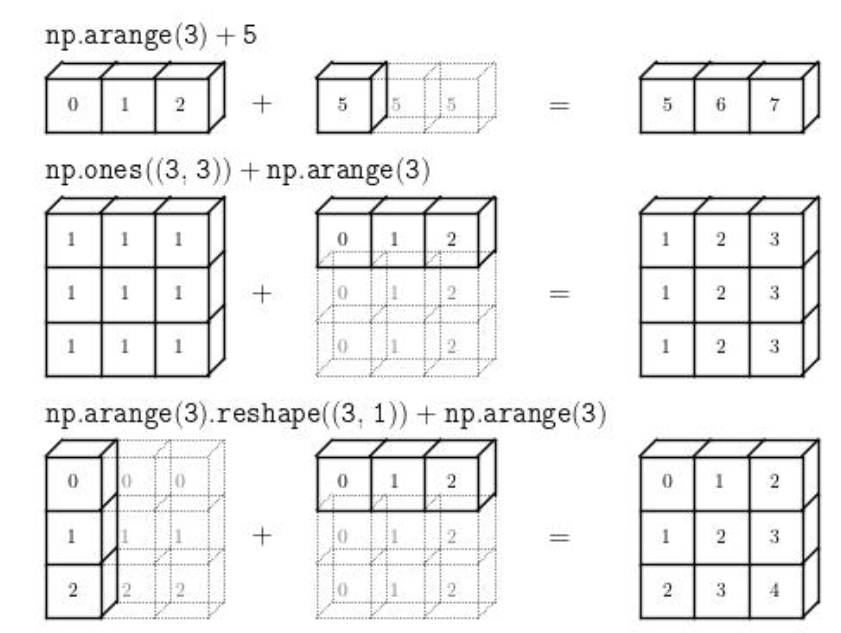

#### For Loop vs. Numpy Array Operations



In [45]:
import time
x = np.arange(10000)
y = np.arange(50)
print('x: ',x)
print()
print('y: ',y)

x:  [   0    1    2 ... 9997 9998 9999]

y:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [46]:
start_loop = time.time()
z = np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        z[i,j] =  x[i]*y[j]

end_loop = time.time()
loop_time = end_loop - start_loop
print(z.astype(int))
print()
print('Duration with For loop: ',loop_time)

[[     0      0      0 ...      0      0      0]
 [     0      1      2 ...     47     48     49]
 [     0      2      4 ...     94     96     98]
 ...
 [     0   9997  19994 ... 469859 479856 489853]
 [     0   9998  19996 ... 469906 479904 489902]
 [     0   9999  19998 ... 469953 479952 489951]]

Duration with For loop:  0.25209712982177734


In [47]:
start_np = time.time()
x_prime = x.reshape(len(x),1)
z = x_prime*y # Element-wise multiplication
print(x_prime.shape)
print(y.shape)
print(z.shape)
end_np = time.time()
np_time = end_np - start_np
print(z)
print()
print('Duration with Numpy Operations: ',np_time)

(10000, 1)
(50,)
(10000, 50)
[[     0      0      0 ...      0      0      0]
 [     0      1      2 ...     47     48     49]
 [     0      2      4 ...     94     96     98]
 ...
 [     0   9997  19994 ... 469859 479856 489853]
 [     0   9998  19996 ... 469906 479904 489902]
 [     0   9999  19998 ... 469953 479952 489951]]

Duration with Numpy Operations:  0.001997709274291992


In [48]:
speed_up = loop_time/np_time
print("Using Broadcasting with Numpy Operations is",speed_up,"times faster!!!!")

Using Broadcasting with Numpy Operations is 126.19310180212436 times faster!!!!


NumPy Broadcasting is one of the most fundamental concepts that makes it so fast and powerful and used all around the globe. Broadcasting applies to element-wise arithmetic operations can occur between 2 NumPy arrays (or a NumPy array and a scalar). Broadcasting is a set of rules that NumPy follows when performing arithmetic operations on arrays of different shapes. The algorithm for broadcasting is as follows:
1. Line up the shapes of both of the arrays we are considering for the broadcast aligning the last dimension of each array on the right hand side.
2. Working from the right to the left, compare the values of the current dimension in question. If the values are equal or if one of the values is 1, then the array (currently) can be broadcastable. Continue to the next dimension to the left until you reach the left most dimension. The end result of the broadcast is the larger of the two values.
1. If all the dimensions are broadcastable, then the arrays can be broadcasted. If not, then the arrays cannot be broadcasted.
   
Let's do an example to see how broadcasting works on paper. Let's say we have the following arrays:

```python
import numpy as np

arr1 = np.array([[1, 2, 3], [4, 5, 6]]) # Shape: (2, 3)
arr2 = np.array([1, 2, 3]) # Shape: (3,) --> broadcasting rules treat (3,) as (1, 3)
arr3 = arr2 * arr1 # Element-wise multiplication
```
The question is, **can we multiply `arr1` and `arr2`?** For this, we need to consult the broadcasting rules since we are doing an arithmetic operation on 2 NumPy Arrays. 

1. Line up the shapes of both of the arrays we are considering for the broadcast aligning the last dimension of each array on the right hand side.

        arr1 (2d array): 2 x 3
        arr2 (1d array): 1 x 3

2. Working from the right to the left, compare the values of the current dimension in question. If the values are equal or if one of the values is 1, then the array (currently) can be broadcastable. Continue to the next dimension to the left until you reach the left most dimension.
   
        Iteration 1: Arr 1: 3, Arr 2: 3. Both are equal. Continue to next dimension.
        Iteration 2: Arr 1: 2, Arr 2: 1. Arr 2 is 1. Arr 2's value is 1. Continue to next dimension.

For this example, we see that the arrays are broadcastable. We can multiply `arr1` and `arr2` together. Let's see what happens when we try to add `arr1` and `arr2` together. The end result of the operation is a 2 x 3 array. Let's see if we're right!

In [49]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]]) # Shape: (2, 3)
arr2 = np.array([1, 2, 3]) # Shape: (3,)
arr3 = arr2 * arr1
arr3

array([[ 1,  4,  9],
       [ 4, 10, 18]])

What NumPy did is multiply `arr2` to each row of `arr1` resulting in a 2 x 3 array.

You may or may not have noticed this, but we actually used NumPy broadcasting in the previous sections too! Let's revisit this piece of code.

```python
numpy_array = np.zeros(1_000_000)
numpy_array = numpy_array + 1
```

Here, we are broadcasting a NumPy array with a scalar. Let's see how the broadcasting rules apply for this case.

1. Line up the shapes of both of the arrays we are considering for the broadcast aligning the last dimension of each array on the right hand side.

        numpy_array (1d array): 1 x 1_000_000
        scalar of 1 (scalar):   1 x 1

2. Working from the right to the left, compare the values of the current dimension in question. If the values are equal or if one of the values is 1, then the array (currently) can be broadcastable. Continue to the next dimension to the left until you reach the left most dimension.
   
        Iteration 1: numpy_array: 1_000_000, scalar: 1. scalar value is 1. Continue to next dimension.
        Iteration 2: numpy_array: 1, scalar: 1. scalar value is 1. Continue to next dimension.

We see that the arrays are broadcastable. We can add `numpy_array` and the scalar together. The end result of the operation is a 1 x 1_000_000 array.
        

### Broadcasting with 3D Matrices

Now, getting back to broadcasting, you might be thinking that it is easy enough to broadcast a scalar over a vector or matrix and maybe a vector over a 2d matrix, but how can someone broadcast a 2d matrix over another 2d matrix? That is where we take everything we've learned here so far and combine them together!

In [50]:
'''Next example: broadcasting one matrix onto another matrix'''
arr1 = np.array([[2,1],[3, 0]])
arr2 = np.array([[9,2],[4, 5]])

print("Original matrices:\n\nARR1:\n",arr1,"\n\nARR2:\n",arr2)

Original matrices:

ARR1:
 [[2 1]
 [3 0]] 

ARR2:
 [[9 2]
 [4 5]]


Now, we will use np.newaxis to help numpy view our arr1 for what it is: a collection of vectors.

In [51]:
_arr1 = arr1[:,:,np.newaxis]
print("_ARR1:\n",_arr1)

_ARR1:
 [[[2]
  [1]]

 [[3]
  [0]]]


This np.newaxis call turns our arr1 into a matrix with the shape 2x2x1, meaning it is a matrix that is made of two 2x1 matrices. Now, when we perform element-wise multiplication, it will broadcast each vector accross our arr2, creating a 3d matrix of size 2x2x2. See the code below:

In [52]:
print("_ARR1:\n",_arr1,"\n\nARR2:\n",arr2)
arr3 = _arr1 * arr2
print("\nARR3:\n",arr3)

_ARR1:
 [[[2]
  [1]]

 [[3]
  [0]]] 

ARR2:
 [[9 2]
 [4 5]]

ARR3:
 [[[18  4]
  [ 4  5]]

 [[27  6]
  [ 0  0]]]


**💡 QUIZ YOURSELF 💡** <br>
Would we get a broadcasting error from the code below? <br>
```python
import numpy as np
arr1 = np.random.rand(8, 1, 6, 1) # Create an (8, 1, 6, 1) 4D array of random numbers
arr2 = np.random.rand(7, 1, 5) # Create a (7, 1, 5) 3D array of random numbers
arr3 = arr1 + arr2 # Add the two arrays together
```

✨ **CHALLENGE** ✨ <br>
Create a Python function that accepts two tuples representing the shapes of 2 NumPy arrays and returns whether or not the arrays can be broadcasted together. The function should return a boolean value. The function is outlined below.

In [53]:
def can_broadcast(shape1, shape2):
    """Returns whether or not the two arrays can be broadcasted together.

    Keyword arguments:
    shape1 -- tuple representing the shape of the first array
    shape2 -- tuple representing the shape of the second array

    Returns:
    boolean -- True if the arrays can be broadcasted together, False otherwise
    """
    # Your code here
    return None

### Operations within a NumPy Array

In addition to the addition, subtraction, multiplication, and division operations, there are another of other operations within the array that are extremely useful like `sum()`, `mean()`, `max()`, `min()`, `std()`, `var()`, `argmax()`, `argmin()`, and `sort()`. These operations are extremely useful when you want to perform a specific operation on an entire array. Let's see how we can use these operations!

In [54]:
arr1 = np.array([[1, 3, 2], [4, 6, 5]]) # Shape: (2, 3)
total_sum = np.sum(arr1)
mean = np.mean(arr1)
max_num = np.max(arr1)
min_num = np.min(arr1)
std = np.std(arr1)
var = np.var(arr1)
argmax = np.argmax(arr1)
argmin = np.argmin(arr1)
sort = np.sort(arr1)

print(f"Total: {total_sum}")
print(f"Mean: {mean}")
print(f"Max: {max_num}")
print(f"Min: {min_num}")
print(f"Standard Deviation: {std}")
print(f"Variance: {var}")
print(f"Argmax: {argmax}")
print(f"Argmin: {argmin}")
print(f"Sort: {sort}")

Total: 21
Mean: 3.5
Max: 6
Min: 1
Standard Deviation: 1.707825127659933
Variance: 2.9166666666666665
Argmax: 4
Argmin: 0
Sort: [[1 2 3]
 [4 5 6]]


All these operations get their answers by operating inside the array. `np.sum()` adds up all the numbers within the array, `np.mean()` averages all the numbers within the array, `np.max()` finds the largest number within the array, `np.min()` finds the smallest number within the array, `np.std()` finds the standard deviation of the numbers within the array, `np.var()` finds the variance of the numbers within the array, `np.argmax()` finds the index of the largest number within the array, `np.argmin()` finds the index of the smallest number within the array, and `np.sort()` sorts the numbers within the array.

However, **what if we only wanted to get the sum of only the columns?** How would we do this? This is where the `axis` parameter comes into play.

#### The `axis` parameter

For each of the methods mentioned above, there is an additional parameter that we can provide called `axis`. The `axis` parameter allows us to specify which axis we want to perform the operation on. By default, the `axis` parameter is set to `None`. This means that the operation will be performed on the entire array. However, we can provide a number that represents a dimension along which we want to perform the operation. Let's see how this works!

In [55]:
arr1 = np.array([[1, 3, 2], [4, 6, 5]]) # Shape: (2, 3)
total_sum = np.sum(arr1, axis=0)
mean = np.mean(arr1, axis=0)
max_num = np.max(arr1, axis=0)
min_num = np.min(arr1, axis=0)
std = np.std(arr1, axis=0)
var = np.var(arr1, axis=0)
argmax = np.argmax(arr1, axis=0)
argmin = np.argmin(arr1, axis=0)
sort = np.sort(arr1, axis=0)

print(f"Total along Axis 0: {total_sum}")
print(f"Mean along Axis 0: {mean}")
print(f"Max along Axis 0: {max_num}")
print(f"Min along Axis 0: {min_num}")
print(f"Standard Deviation along Axis 0: {std}")
print(f"Variance along Axis 0: {var}")
print(f"Argmax along Axis 0: {argmax}")
print(f"Argmin along Axis 0: {argmin}")
print(f"Sort along Axis 0: {sort}")

Total along Axis 0: [5 9 7]
Mean along Axis 0: [2.5 4.5 3.5]
Max along Axis 0: [4 6 5]
Min along Axis 0: [1 3 2]
Standard Deviation along Axis 0: [1.5 1.5 1.5]
Variance along Axis 0: [2.25 2.25 2.25]
Argmax along Axis 0: [1 1 1]
Argmin along Axis 0: [0 0 0]
Sort along Axis 0: [[1 3 2]
 [4 6 5]]


We see that we get a different result when we set `axis=0`. For the operations like `sum`, `mean`, etc., we see that instead of getting a single number, we get an 3 x 1 array. This is because `axis=0` performs the operations along the "0th dimension". Remember that NumPy organizes the shape of the array as (# rows, # columns, # channels). The 0th index of this tuple is the number of rows. So, when we set `axis=0`, we are performing the operation along the rows. 

For sorts, we don't change the shape of the array, but the sorting occurs along the rows.

<p align="center">
  <img src="https://cdn-coiao.nitrocdn.com/CYHudqJZsSxQpAPzLkHFOkuzFKDpEHGF/assets/static/optimized/rev-85bf93c/wp-content/uploads/2018/12/numpy-axis0_updated-v2.png" />
</p>

Can you guess what happens when we set `axis=1`?

In [56]:
arr1 = np.array([[1, 3, 2], [4, 6, 5]]) # Shape: (2, 3)
total_sum = np.sum(arr1, axis=1)
mean = np.mean(arr1, axis=1)
max_num = np.max(arr1, axis=1)
min_num = np.min(arr1, axis=1)
std = np.std(arr1, axis=1)
var = np.var(arr1, axis=1)
argmax = np.argmax(arr1, axis=1)
argmin = np.argmin(arr1, axis=1)
sort = np.sort(arr1, axis=1)

print(f"Total along Axis 0: {total_sum}")
print(f"Mean along Axis 0: {mean}")
print(f"Max along Axis 0: {max_num}")
print(f"Min along Axis 0: {min_num}")
print(f"Standard Deviation along Axis 0: {std}")
print(f"Variance along Axis 0: {var}")
print(f"Argmax along Axis 0: {argmax}")
print(f"Argmin along Axis 0: {argmin}")
print(f"Sort along Axis 0: {sort}")

Total along Axis 0: [ 6 15]
Mean along Axis 0: [2. 5.]
Max along Axis 0: [3 6]
Min along Axis 0: [1 4]
Standard Deviation along Axis 0: [0.81649658 0.81649658]
Variance along Axis 0: [0.66666667 0.66666667]
Argmax along Axis 0: [1 1]
Argmin along Axis 0: [0 0]
Sort along Axis 0: [[1 2 3]
 [4 5 6]]


For the operations like `sum`, `mean`, etc., we see that instead of getting a single number, we get an 2 x 1 array. This is because `axis=1` performs the operations along the "1st dimension". Remember that NumPy organizes the shape of the array as (# rows, # columns, # channels). The 1st index of this tuple is the number of columns. So, when we set `axis=1`, we are performing the operation along the columns. 

For sorts, we don't change the shape of the array, but the sorting occurs along the columns.

<p align="center">
  <img src="https://cdn-coiao.nitrocdn.com/CYHudqJZsSxQpAPzLkHFOkuzFKDpEHGF/assets/static/optimized/rev-85bf93c/wp-content/uploads/2018/12/numpy-arrays-have-axes_updated_v2.png" />
</p>

What about `axis=2`? This would perform the operation along the channels (for 3D arrays)

Similar to `.reshape` where we can use -1 to make NumPy figure out the shape for us, we can also use -1 for the `axis` parameter. Numpy will automatically get the largest dimension possible and perform the operation on that dimension. (EX: if we had a 3D array, using `axis=-1` would be the same as using `axis=1`)

In [58]:
arr1 = np.array([[1, 3, 2], [4, 6, 5]]) # Shape: (2, 3)
total_sum = np.sum(arr1, axis=-1)
mean = np.mean(arr1, axis=-1)
max_num = np.max(arr1, axis=-1)
min_num = np.min(arr1, axis=-1)
std = np.std(arr1, axis=-1)
var = np.var(arr1, axis=-1)
argmax = np.argmax(arr1, axis=-1)
argmin = np.argmin(arr1, axis=-1)
sort = np.sort(arr1, axis=-1)

print(f"Total along Axis 0: {total_sum}")
print(f"Mean along Axis 0: {mean}")
print(f"Max along Axis 0: {max_num}")
print(f"Min along Axis 0: {min_num}")
print(f"Standard Deviation along Axis 0: {std}")
print(f"Variance along Axis 0: {var}")
print(f"Argmax along Axis 0: {argmax}")
print(f"Argmin along Axis 0: {argmin}")
print(f"Sort along Axis 0: {sort}")

Total along Axis 0: [ 6 15]
Mean along Axis 0: [2. 5.]
Max along Axis 0: [3 6]
Min along Axis 0: [1 4]
Standard Deviation along Axis 0: [0.81649658 0.81649658]
Variance along Axis 0: [0.66666667 0.66666667]
Argmax along Axis 0: [1 1]
Argmin along Axis 0: [0 0]
Sort along Axis 0: [[1 2 3]
 [4 5 6]]


This returns the same result as using `axis=1`

**💡 QUIZ YOURSELF 💡** <br>
What is the shape of `arr2`? <br>
```python
import numpy as np
arr1 = np.random.rand(7, 1, 5) # Create a (7, 1, 5) 3D array of random numbers
arr2 = np.sum(arr1, axis=-1)
```

#### Logical Masking

For those who have taken the CS 1371 (MATLAB) class at Georgia Tech, this is a concept that should be familiar with you (especially if you remember Kantwon putting the pie to his face 😂). Logical Masking is a really important concept about how we can filter arrays without using explicit loops. We do this by using an array in a boolean context. For example, we can do the following with NumPy arrays:

```python
arr1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
arr1 > 5 # Returns a boolean array
```

The result of the above operation is a resulting NumPy array that contains Trues and Falses about whether the number at that specific position is greater than 5.

In [59]:
arr1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
arr1 > 5

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

This "boolean array" is also know as a **mask** or **boolean mask** since we can use this to filter out components of the original array using the following syntax:

In [60]:
arr1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
arr1[arr1 > 5]

array([ 6,  7,  8,  9, 10])

In [61]:
arr1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(2, 5) # Shape: (2, 5)
arr1 > 5

array([[False, False, False, False, False],
       [ True,  True,  True,  True,  True]])

We can also combine multiple conditions using the bitwise & (and) and | (or) operators. We need to put parenthesis around each of these masks to avoid cryptic errors and to make sure that result is correct.

In [62]:
arr1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
arr1[(arr1 > 5) & (arr1 % 2 == 0)] # Get all even numbers greater than 5

array([ 6,  8, 10])

One function that also works with NumPy arrays is the `np.where()` function. This function takes in a condition and returns the indices where the condition is true instead of returning a boolean array. This is useful when we want to get the indices of the elements that satisfy a certain condition. `np.where()` returns a tuple, and the array of indices is the first element of the tuple.

In [63]:
arr1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
np.where(arr1 > 5)[0]

array([5, 6, 7, 8, 9], dtype=int64)

We can also use `np.where()` to do replacements within the array!

In [64]:
arr1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
np.where(arr1 > 5, 1, 0) # Get all numbers greater than 5 and replace them with 1, otherwise replace with 0

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

**💡 QUIZ YOURSELF 💡** <br>
What would be the output of this operation? <br>
```python
import numpy as np
arr1 = np.zeros((5, 5))
arr1[np.where(arr1 == 0)] = 1
print(arr1)
```

✨ **BROADCASTING CHALLENGE** ✨ <br>
What would be the output of this piece of code? <br>
```python
import numpy as np
arr1 = np.arange(3).reshape(3, 1) + np.arange(3)
print(arr1)
```

## Treating NumPy Arrays as Matrices

Many of these arrays can also be thought of as matrices, and as a result, we can perform matrix operations on them. With a single array, we can take its transpose, inverse, and determinant. To do many of these operations, we need to use the `np.linalg` module. This module contains many of the linear algebra functions that we would need. Let's see how we can use these functions.

In [65]:
arr1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(3, 3) # Shape: (3, 3)
arr1 # See the array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

To take the transpose, we can either use the `transpose()` method or the `T` attribute.

In [66]:
arr1.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [67]:
arr1.transpose()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

To take the determinant of a matrix, we can use the `det()` function.

In [68]:
det = np.linalg.det(arr1)
det

-9.51619735392994e-16

To take the inverse of an array, we can use the `inv` or `pinv` function. The `pinv` function is used when the array is not invertible. The `pinv` function returns the pseudo-inverse of the array (we will talk about this in the second week of class).

In [69]:
np.linalg.inv(arr1)

array([[ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15],
       [-6.30503948e+15,  1.26100790e+16, -6.30503948e+15],
       [ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15]])

### Matrix Multiplication

Almost every single ML algorithm at one point or another will use Matrix Multiplication. Fortunately NumPy has us covered with multiple different ways to multiple two matrices. The three main ways of multiplying matrices are:
1. `np.matmul()`
2. `np.dot()`
3. `@`

In [70]:
arr1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(3, 3) # Shape: (3, 3)
arr2 = np.array([1, 2, 3]).reshape(3, 1) # Shape: (3, 1)
print(f"Using matmul: {np.matmul(arr1, arr2)}")
print(f"Using dot: {np.dot(arr1, arr2)}")
print(f"Using @: {arr1 @ arr2}")

Using matmul: [[14]
 [32]
 [50]]
Using dot: [[14]
 [32]
 [50]]
Using @: [[14]
 [32]
 [50]]


We see we get the same answer using each of the methods. Why does NumPy have so many ways of doing the same thing? Well, it turns out that each of these methods have different rules for how they handle the dimensions of the matrices. For example, `np.matmul()` and `@` will only work if the dimensions of the matrices are compatible. `np.dot()` will work for any dimensions of the matrices. In addition, `np.dot()` will perform element-wise multiplication if the matrices are 1D arrays. This is why it is important to know the differences between these methods. Yoou can see the all the rules for `np.dot()` [here](https://numpy.org/doc/stable/reference/generated/numpy.dot.html).

Because `np.dot()` can be confusing, we recommend students to use `np.matmul()` or `@` for matrix multiplication. This will make sure that you don't accidentally perform element-wise multiplication and end up spending hours debugging your code.

We also especially recommend using `@` instead of `np.matmul()` since it is much more readable. `@` under the hood is just calling `np.matmul()` so there is no performance difference between the two.

## Combining NumPy Arrays

Sometimes, we have multiple NumPy arrays that we want to combine together to create a bigger NumPy array. With NumPy, there are several ways to make this happen. The main way to do this `np.concatenate` relies on the `axis` parameter, so be sure to look a couple sections before to see the detailed breakdown of the `axis` parameter! Let's see how we can use `np.concatenate`!

In [71]:
arr1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(3, 3) # Shape: (3, 3)
arr1 # See the array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [72]:
arr2 = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18]).reshape(3, 3) # Shape: (3, 3)
arr2 # See the array

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [73]:
arr3 = np.concatenate((arr1, arr2), axis=0) # Concatenate along axis 0
arr3

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

`np.concatenate` works the same way with the axis parameter as some of the other NumPy functions we saw earlier that use `axis`. Here, we add the second array to the rows of the original first array. **However, one important thing to note is how we had to pass in a tuple of NumPy arrays!** Without this, we get cryptic errors from NumPy. Another NumPy function that does the same thing is `np.vstack()`.

In [74]:
np.vstack((arr1, arr2)) # Concatenate along axis 0

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [75]:
arr4 = np.concatenate((arr1, arr2), axis=1) # Concatenate along axis 1
arr4

array([[ 1,  2,  3, 10, 11, 12],
       [ 4,  5,  6, 13, 14, 15],
       [ 7,  8,  9, 16, 17, 18]])

Here, with `axis=1`, we add along the columns of the original array. Another NumPy function that does the same thing is `np.hstack()`

In [76]:
np.hstack((arr1, arr2)) # Concatenate along axis 1

array([[ 1,  2,  3, 10, 11, 12],
       [ 4,  5,  6, 13, 14, 15],
       [ 7,  8,  9, 16, 17, 18]])

In [77]:
arr5 = np.concatenate((arr1, arr2), axis=-1) # Concatenate along axis -1
arr5

array([[ 1,  2,  3, 10, 11, 12],
       [ 4,  5,  6, 13, 14, 15],
       [ 7,  8,  9, 16, 17, 18]])

## References
1. [Official NumPy Broadcasting Tutorial](https://numpy.org/doc/stable/user/basics.broadcasting.html)
2. [Great Python and NumPy Tutorial by Stanford](https://cs231n.github.io/python-numpy-tutorial/)
3. [NumPy Axis Tutorial](https://www.sharpsightlabs.com/blog/numpy-axes-explained/)
4. [Axis 3D Array](https://python.pages.doc.ic.ac.uk/2021/lessons/numpy/02-ndarray/02-creation.html)

# Data Analysis Toolbox Session 2

## Real Example
#### Let's create an 8-bit grayscale bit-depth, 512 x 512 derived image for easy use in demos

#### [What is Kernel](http://setosa.io/ev/image-kernels/)

In [74]:
import scipy.misc
import scipy
ascent = scipy.misc.ascent()
ascent

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ...,
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

In [75]:
ascent.shape

(512, 512)

In [76]:
ascent.max()

255

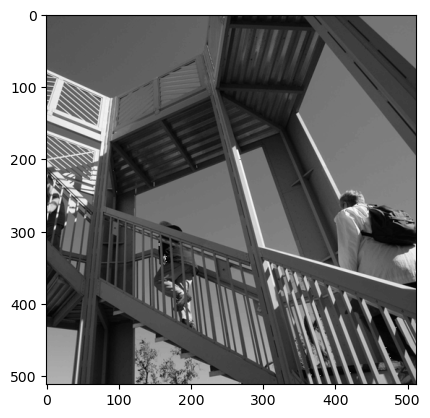

In [77]:
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(ascent)
plt.show()

**Blur the image: for each pixel, replace the value to the average of its eight neighbors and itself**

In [78]:
F = np.ones((3, 3),np.float32) / 9
F

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

In [79]:
m, n = ascent.shape
blurred = np.zeros((m, n))

In [80]:
for i in range(1, m-1):
    for j in range(1, n-1):
        blurred[i][j] = np.sum(ascent[i-1:i+2, j-1:j+2] * F)
blurred

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  82.22222283,  82.66666728, ..., 117.00000087,
        117.00000087,   0.        ],
       [  0.        ,  82.00000061,  82.55555617, ..., 117.00000087,
        117.00000087,   0.        ],
       ...,
       [  0.        , 177.66666799, 177.66666799, ...,  56.66666709,
         58.22222266,   0.        ],
       [  0.        , 178.00000133, 178.00000133, ...,  54.0000004 ,
         57.22222265,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

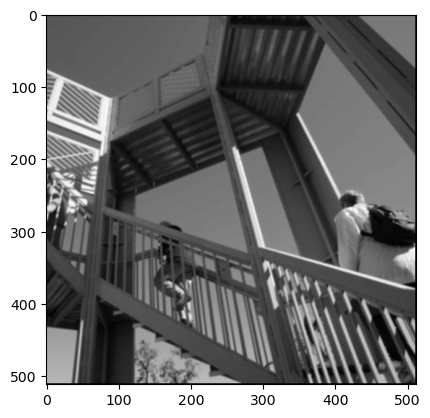

In [81]:
plt.imshow(blurred)
plt.show()

# Matplotlib

In [82]:
import matplotlib.pyplot as plt

#### Scatter Plot

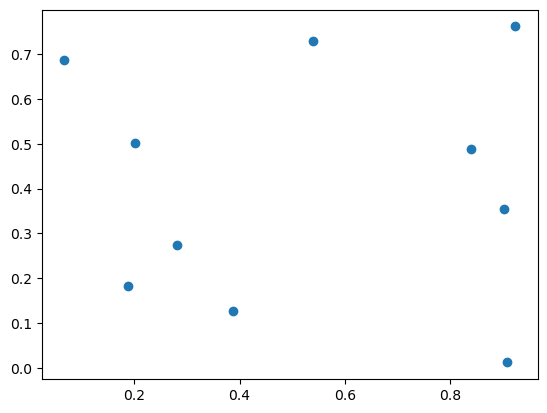

In [83]:
x = nprd.random(10)
y = nprd.random(10)
plt.scatter(x, y)

#### Histogram

In [84]:
x = [1, 2, 2, 2, 3, 2, 1, 3, 2, 2, 4]

(array([2., 6., 2., 1.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <BarContainer object of 4 artists>)

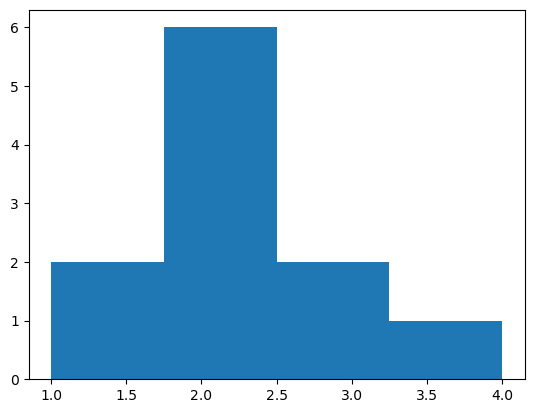

In [85]:
plt.hist(x, bins=4)

#### Lines

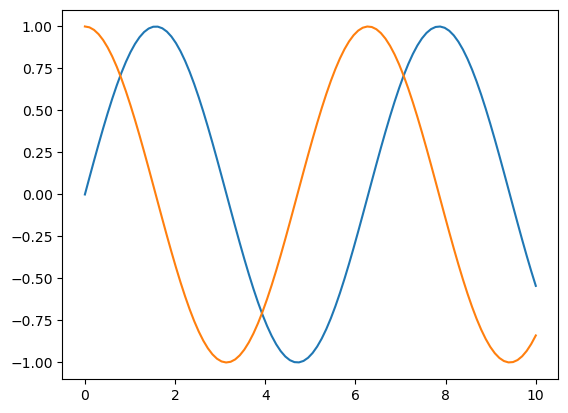

In [86]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

#### Linepoints

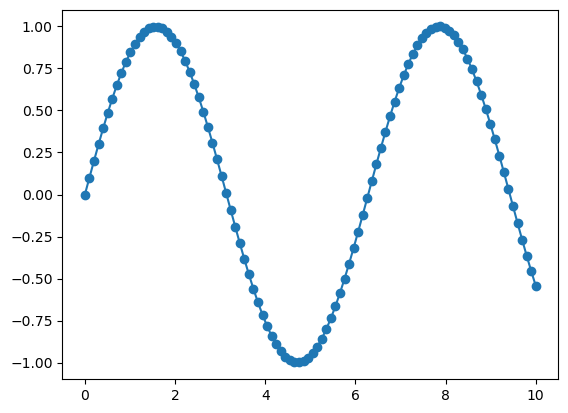

In [87]:
plt.plot(x, np.sin(x), 'o-')
plt.show()

#### Bars

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

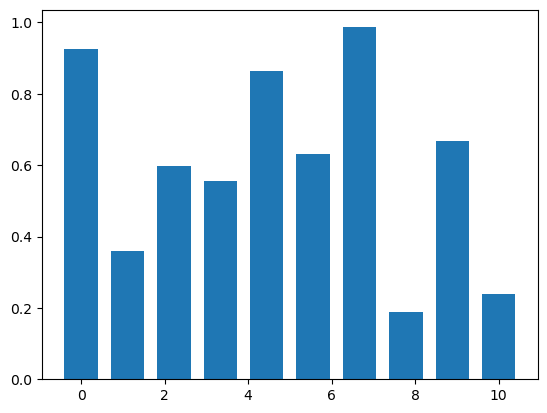

In [88]:
x = np.linspace(0, 10, 10)
y = nprd.random(10)
plt.bar(x, y)
x

# Probability Distributions

## Generate random samples

#### [Uniform Distribution](https://en.wikipedia.org/wiki/Discrete_uniform_distribution)

In [89]:
x = nprd.uniform(0, 1, 10000)
x.shape

(10000,)

(array([ 992.,  968.,  975., 1029.,  973.,  991., 1012., 1044.,  985.,
        1031.]),
 array([1.54418674e-05, 1.00010617e-01, 2.00005792e-01, 3.00000967e-01,
        3.99996142e-01, 4.99991317e-01, 5.99986492e-01, 6.99981667e-01,
        7.99976842e-01, 8.99972018e-01, 9.99967193e-01]),
 <BarContainer object of 10 artists>)

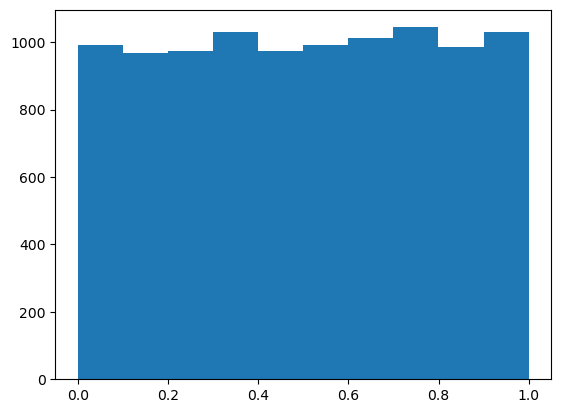

In [90]:
plt.hist(x, 10)

#### [Binomial Distribution](https://en.wikipedia.org/wiki/Binomial_distribution)

In [91]:
x = nprd.binomial(10, 0.7, 1000)

(array([ 12.,   0.,  36.,   0.,   0.,  94.,   0.,   0., 213.,   0.,   0.,
        272.,   0.,   0., 215.,   0.,   0., 130.,   0.,  28.]),
 array([ 3.  ,  3.35,  3.7 ,  4.05,  4.4 ,  4.75,  5.1 ,  5.45,  5.8 ,
         6.15,  6.5 ,  6.85,  7.2 ,  7.55,  7.9 ,  8.25,  8.6 ,  8.95,
         9.3 ,  9.65, 10.  ]),
 <BarContainer object of 20 artists>)

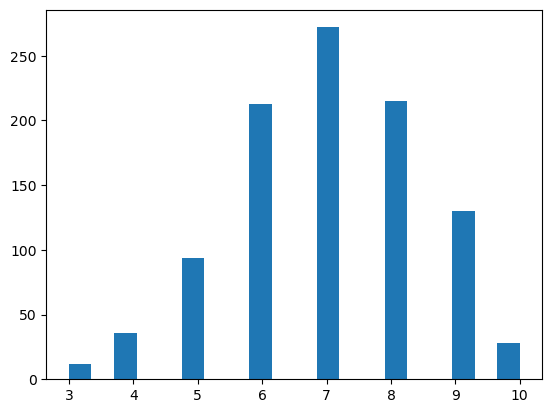

In [92]:
plt.hist(x, 20)

#### [Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution)

In [93]:
x = nprd.normal(0, 1.0, 1000)

#### [68–95–99.7 Rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)

(array([  8.,  23.,  64., 162., 267., 264., 150.,  51.,   9.,   2.]),
 array([-3.42890275, -2.72907059, -2.02923843, -1.32940627, -0.62957411,
         0.07025806,  0.77009022,  1.46992238,  2.16975454,  2.8695867 ,
         3.56941887]),
 <BarContainer object of 10 artists>)

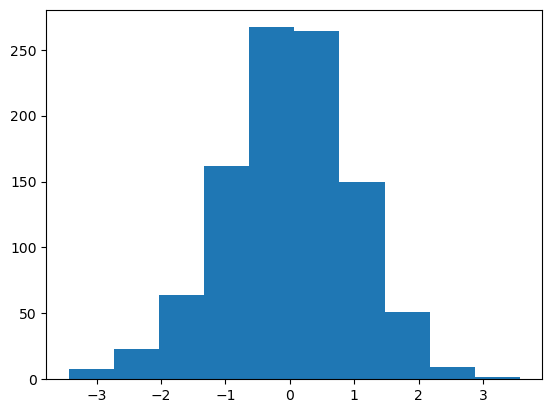

In [94]:
plt.hist(x)

#### 2D Gaussian
$$ Covariance = \left( \begin{array}{ccc}  \sigma(x, x) & \sigma(x, y) \\  \sigma(y, x) & \sigma(y, y) \end{array} \right)$$

In [95]:
mean = [0, 0]
cov = [[1, -20], [-20, 625]] 
x, y = nprd.multivariate_normal(mean, cov, 1000).T


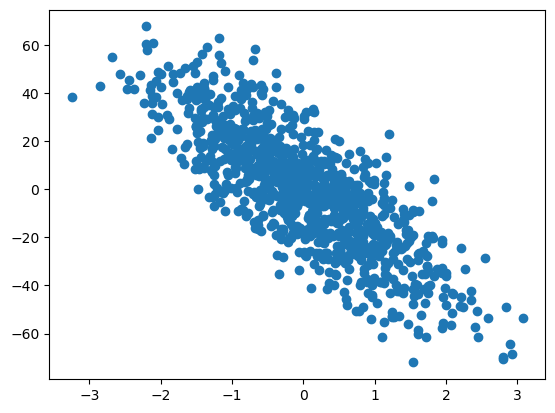

In [96]:
plt.scatter(x, y)

## Estimate Parameters from Samples

---



In [97]:
x = nprd.normal(0, 1.0, 1000)

In [98]:
mu = np.mean(x)
sigma = np.std(x)
mu, sigma

(-0.011385500377134379, 0.9911743148830415)

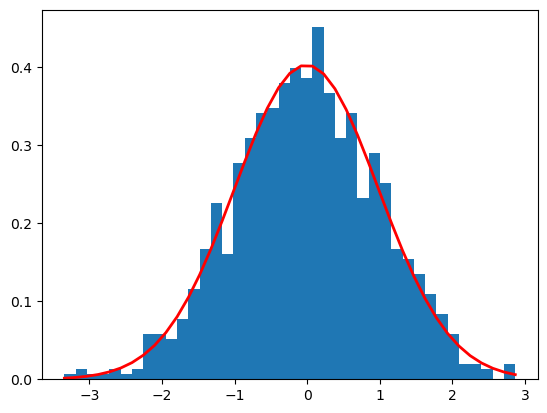

In [99]:
count, bins, ignored = plt.hist(x, 40, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),  linewidth=2, color='r')
plt.show()

In [100]:
bins

array([-3.34492454, -3.18965873, -3.03439291, -2.8791271 , -2.72386128,
       -2.56859547, -2.41332965, -2.25806384, -2.10279802, -1.94753221,
       -1.79226639, -1.63700057, -1.48173476, -1.32646894, -1.17120313,
       -1.01593731, -0.8606715 , -0.70540568, -0.55013987, -0.39487405,
       -0.23960823, -0.08434242,  0.0709234 ,  0.22618921,  0.38145503,
        0.53672084,  0.69198666,  0.84725247,  1.00251829,  1.1577841 ,
        1.31304992,  1.46831574,  1.62358155,  1.77884737,  1.93411318,
        2.089379  ,  2.24464481,  2.39991063,  2.55517644,  2.71044226,
        2.86570808])